<a href="https://colab.research.google.com/github/Yash-Kamtekar/Clustering-techniques/blob/main/Hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hierarchical clustering**

import libraries

In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mounting drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import daataset usin pandasg

In [45]:
df = pd.read_csv('/content/drive/MyDrive/255/Assignment_4/shopping.csv')
df

,Shopper,Spending Index,Income Index
0,1,3,5
1,2,3,4
2,3,5,6
3,4,2,6
4,5,4,5
5,6,6,8
6,7,6,2
7,8,6,3
8,9,5,6
9,10,6,7


just keeping Spending Index & Income Index values in the data frame

In [ ]:
df = df[['Spending Index', 'Income Index']]

rescale each feature dimension of the observation set by its standard deviation.

In [49]:
from scipy.cluster.vq import whiten

df['x_whitened'] = whiten(df['Spending Index'])
df['y_whitened'] = whiten(df['Income Index'])

visualise the points for 2 clusters

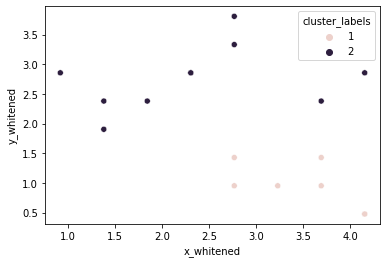

In [50]:
from scipy.cluster.hierarchy import linkage, fcluster

distance_matrix = linkage(df[['x_whitened', 'y_whitened']], method='ward', metric='euclidean')

df['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

sns.scatterplot(x='x_whitened', y='y_whitened', hue='cluster_labels', data=df)

visualise the dendogram

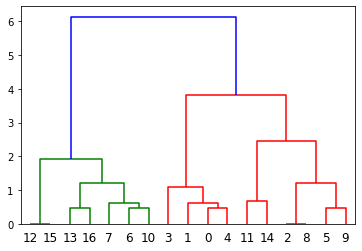

In [51]:
from scipy.cluster.hierarchy import dendrogram

dn = dendrogram(distance_matrix)

AgglomerativeClustering for 3 clusters

In [52]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
agg.fit(df)
AgglomerativeClustering(n_clusters=3)

AgglomerativeClustering(n_clusters=3)

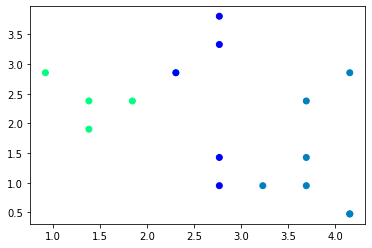

In [53]:
plt.scatter(df['x_whitened'], df['y_whitened'], c = AgglomerativeClustering(n_clusters = 3).fit_predict(df), cmap =plt.cm.winter) 

plt.show()